In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
# palette de couleurs correspondant aux couleurs du nutriscore
palette = ['green', 'limegreen', 'gold', 'tab:orange', 'tab:red']

from sklearn import decomposition, preprocessing

from scipy import stats

from my_functions import *

# Analyse univariée

## Importation des données

In [2]:
df = pd.read_csv('df.csv', index_col=0)
print(df.shape)
df.head()

(71063, 16)


,nutrition_grade_fr,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,additives_n,alcohol_100g,cholesterol_100g
182,A,-2,Cereals and potatoes,Legumes,Aliments et boissons à base de végétaux,1093.022712,13.168396,5.196503,28.010448,13.188017,0.0,10.0,0.090,0.0,0.0,0.000000
184,E,20,Sugary snacks,Biscuits and cakes,Sablés,1093.022712,13.168396,5.196503,28.010448,13.188017,0.0,6.4,0.560,3.0,0.0,0.091000
188,C,2,Beverages,Non-sugared beverages,Thés,1093.022712,13.168396,5.196503,28.010448,13.188017,0.0,0.5,0.000,0.0,0.0,0.000805
190,D,14,NaN,NaN,NaN,1753.000000,16.771678,0.800000,100.000000,87.700000,0.9,0.6,0.010,0.0,0.0,0.000000
191,D,14,NaN,NaN,NaN,2406.000000,26.219487,2.900000,64.552212,50.300000,3.9,9.5,0.003,0.0,0.0,0.000000


In [3]:
df.isna().mean().sort_values()

nutrition-score-fr_100g    0.000000
energy_100g                0.000000
fat_100g                   0.000000
saturated-fat_100g         0.000000
carbohydrates_100g         0.000000
sugars_100g                0.000000
fiber_100g                 0.000000
proteins_100g              0.000000
salt_100g                  0.000000
additives_n                0.000000
alcohol_100g               0.000000
cholesterol_100g           0.000000
nutrition_grade_fr         0.000563
main_category_fr           0.232329
pnns_groups_2              0.297553
pnns_groups_1              0.320378
dtype: float64

## Variables quantitatives

In [4]:
df.describe()

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,additives_n,alcohol_100g,cholesterol_100g
count,71063.000000,71063.000000,71063.000000,71063.000000,71063.000000,71063.000000,71063.000000,71063.000000,71063.000000,71063.000000,71063.000000,71063.000000
mean,8.529192,1106.255665,13.570075,5.310043,27.995534,13.191478,1.468467,7.586390,1.080904,1.280526,0.265684,0.016169
std,8.735287,714.017353,15.058556,7.735849,23.529252,17.451650,3.111512,7.795969,3.957584,2.303670,2.343548,0.042580
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,497.000000,2.200000,0.400000,10.500000,1.300000,0.000000,1.400000,0.050000,0.000000,0.000000,0.000000
50%,9.000000,1093.022712,11.900000,2.900000,22.800000,6.300000,0.000000,5.900000,0.508000,0.000000,0.000000,0.000000
75%,15.000000,1552.000000,18.500000,5.806800,41.000000,13.188017,1.900000,11.000000,1.200000,2.000000,0.000000,0.006665
max,40.000000,3774.000000,100.000000,100.000000,100.000000,100.000000,44.000000,90.000000,100.000000,31.000000,69.000000,0.348500


In [5]:
# nombre de colonnes de type numérique
print(df.select_dtypes(np.number).columns.size, '\n')
#nom des colonnes
for col in df.select_dtypes(np.number):
    print(col)

12 

nutrition-score-fr_100g
energy_100g
fat_100g
saturated-fat_100g
carbohydrates_100g
sugars_100g
fiber_100g
proteins_100g
salt_100g
additives_n
alcohol_100g
cholesterol_100g


### Apports nutritionnels

In [6]:
nutrition_facts = ['energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'alcohol_100g', 'cholesterol_100g']

Observons la répartition des valeurs à l'aide de boxplot

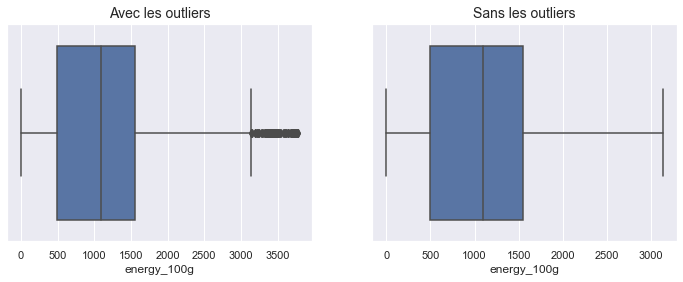

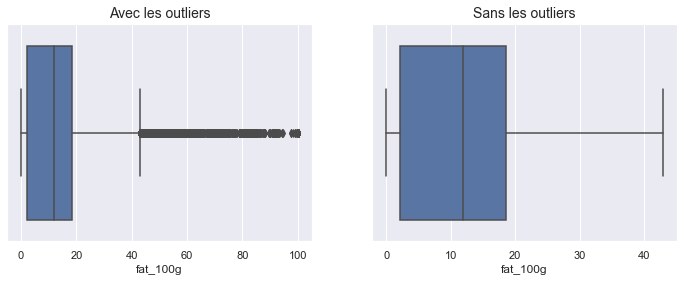

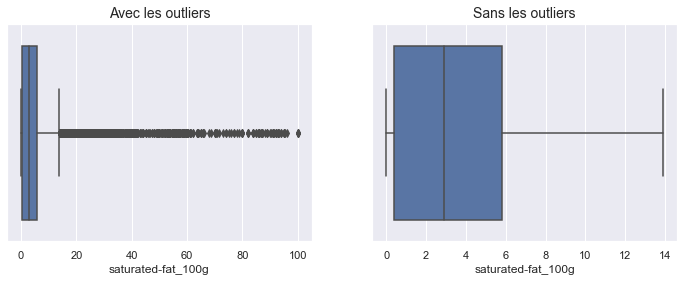

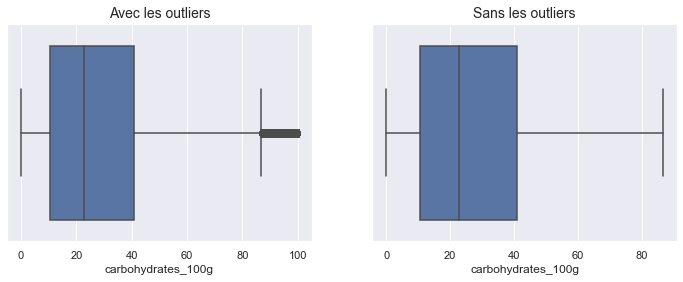

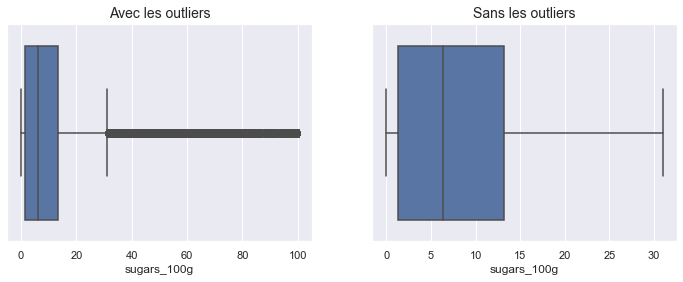

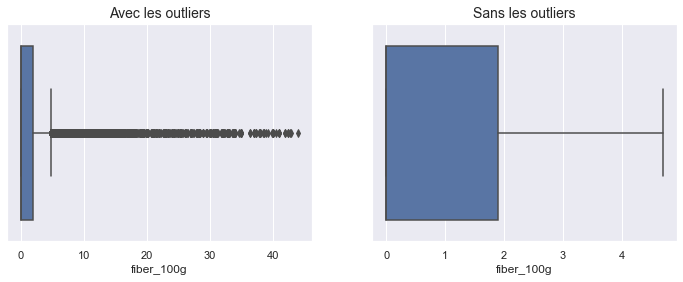

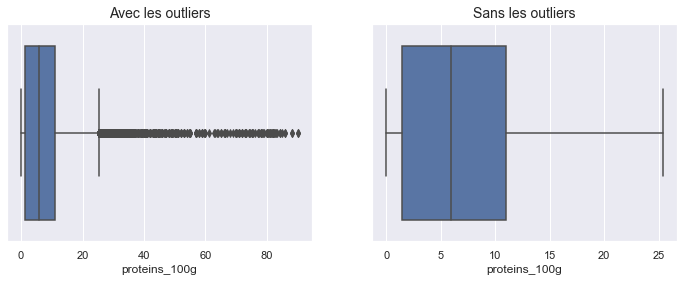

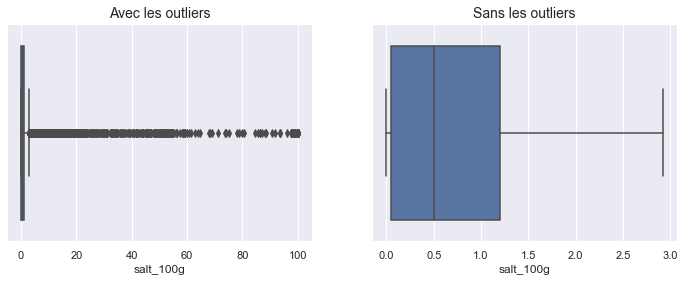

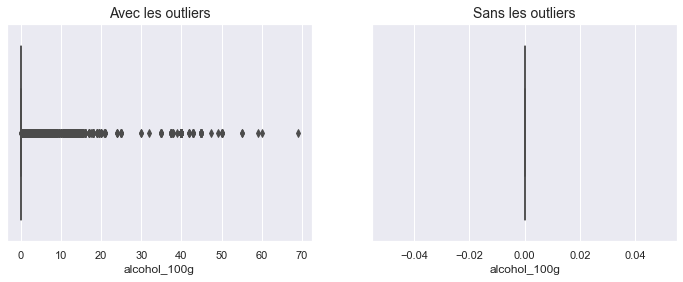

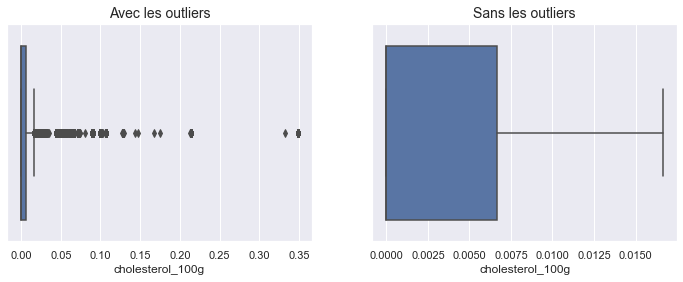

In [7]:
for col in nutrition_facts:
    fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12,4))
    sns.boxplot(x=df[col], ax=axs[0])
    sns.boxplot(x=df[col], ax=axs[1], showfliers=False)
    axs[0].set_title('Avec les outliers', fontsize=14)
    axs[1].set_title('Sans les outliers', fontsize=14)

### Score nutritionnel

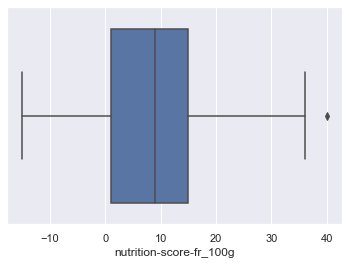

In [8]:
sns.boxplot(x=df['nutrition-score-fr_100g']);

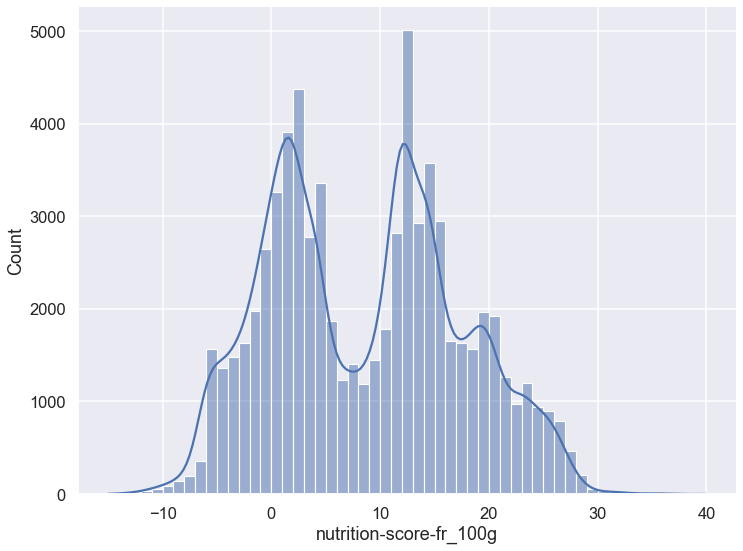

In [9]:
sns.set_context('talk')
sns.displot(x='nutrition-score-fr_100g', 
            data=df.sort_values('nutrition_grade_fr'), 
            bins=55, kde=True,
            height=8, aspect=8/6)
sns.set_context('notebook')

### Nombre d'additifs

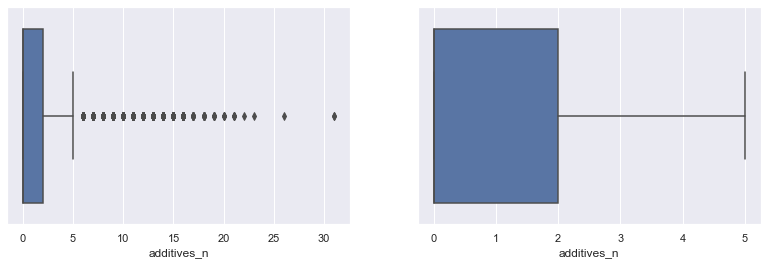

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(13.5,4))
sns.boxplot(x=df['additives_n'], ax=axs[0])
sns.boxplot(x=df['additives_n'], showfliers=False, ax=axs[1]);

## Variables qualitatives

In [11]:
# On affiche les variables qualitatives et le nombre de catégories qu'elles contiennent
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique().size}')

nutrition_grade_fr-------------------------------- 6
pnns_groups_1------------------------------------- 10
pnns_groups_2------------------------------------- 37
main_category_fr---------------------------------- 1010


### Nutriscore

Répartition des nutriscores

In [12]:
# Répartition des nutriscores en %
df["nutrition_grade_fr"].value_counts(normalize=True).sort_index()*100

A    16.657984
B    14.714951
C    21.210031
D    29.356687
E    18.060347
Name: nutrition_grade_fr, dtype: float64

<AxesSubplot:ylabel=' '>

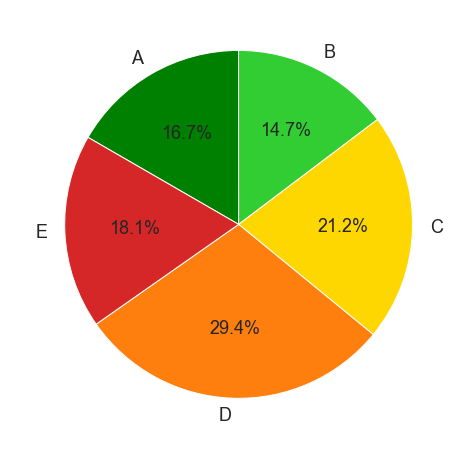

In [13]:
plt.figure(figsize=(8,8))
df["nutrition_grade_fr"].value_counts().sort_index().plot.pie(counterclock=False,
                                                             startangle=150, autopct='%1.1f%%',# ax=ax,
                                                             textprops={'fontsize':18},
                                                              ylabel=' ',
                                                              colors=palette
                                                             )

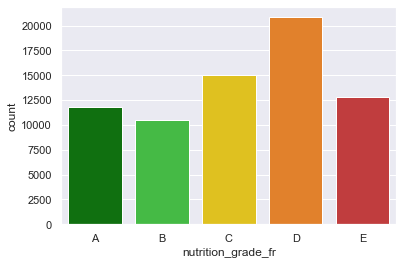

In [14]:
g = sns.countplot(x='nutrition_grade_fr', data=df, order=list('ABCDE'), 
                  palette=palette
                 )

### pnns_groups_1

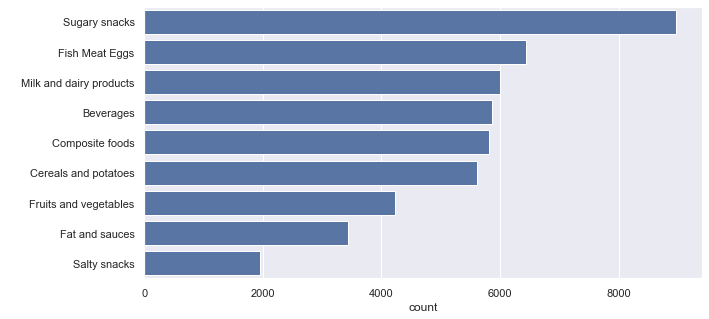

In [15]:
plt.figure(figsize=(10, 5))
order = df['pnns_groups_1'].value_counts().index
g = sns.countplot(y="pnns_groups_1", order=order, data=df, color='b')
g.axes.set_ylabel(' ');

### pnns_groups_2

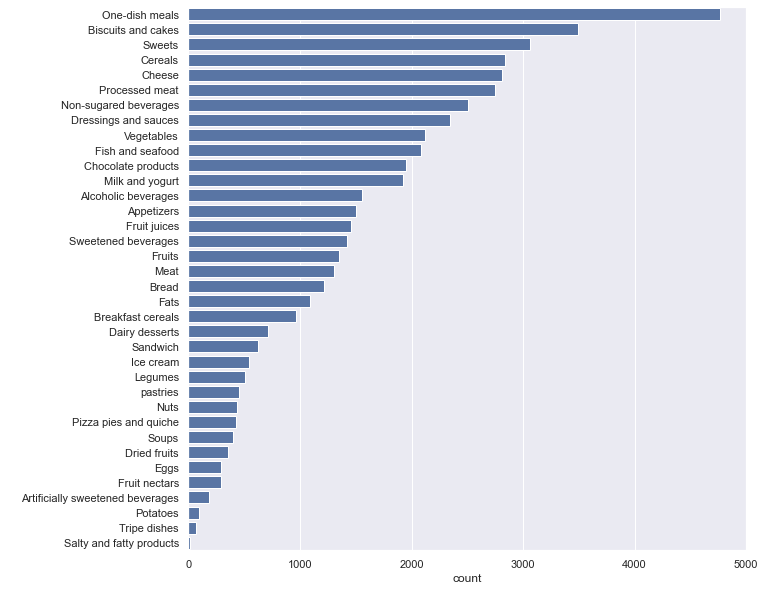

In [16]:
plt.figure(figsize=(10,10))
order = df['pnns_groups_2'].value_counts().index
g = sns.countplot(y="pnns_groups_2", order=order, data=df, color='b')
g.axes.set_ylabel(' ');

### main_category

In [17]:
# Répartition des valeurs de 'main_category_fr' en %
df["main_category_fr"].value_counts(normalize=True).sort_values(ascending=False)*100

Boissons                                            6.758565
Conserves                                           3.504848
Epicerie                                            3.405862
Chocolats                                           3.173061
Plats préparés                                      3.107070
                                                      ...   
Olives-vertes-farcie-a-la-pate-d-anchois            0.001833
en:Tuiles-salees                                    0.001833
Graankorrels                                        0.001833
Viandes-sechees                                     0.001833
en:Cremes-vegetales-a-base-de-coco-pour-cuisiner    0.001833
Name: main_category_fr, Length: 1009, dtype: float64

# Analyse bivariée

## Relations numérique / numérique

### Pairplot

On échantillonne le data set car sinon le pairplot met trop de temps à s'afficher

In [18]:
sample = df.sample(n=10000)

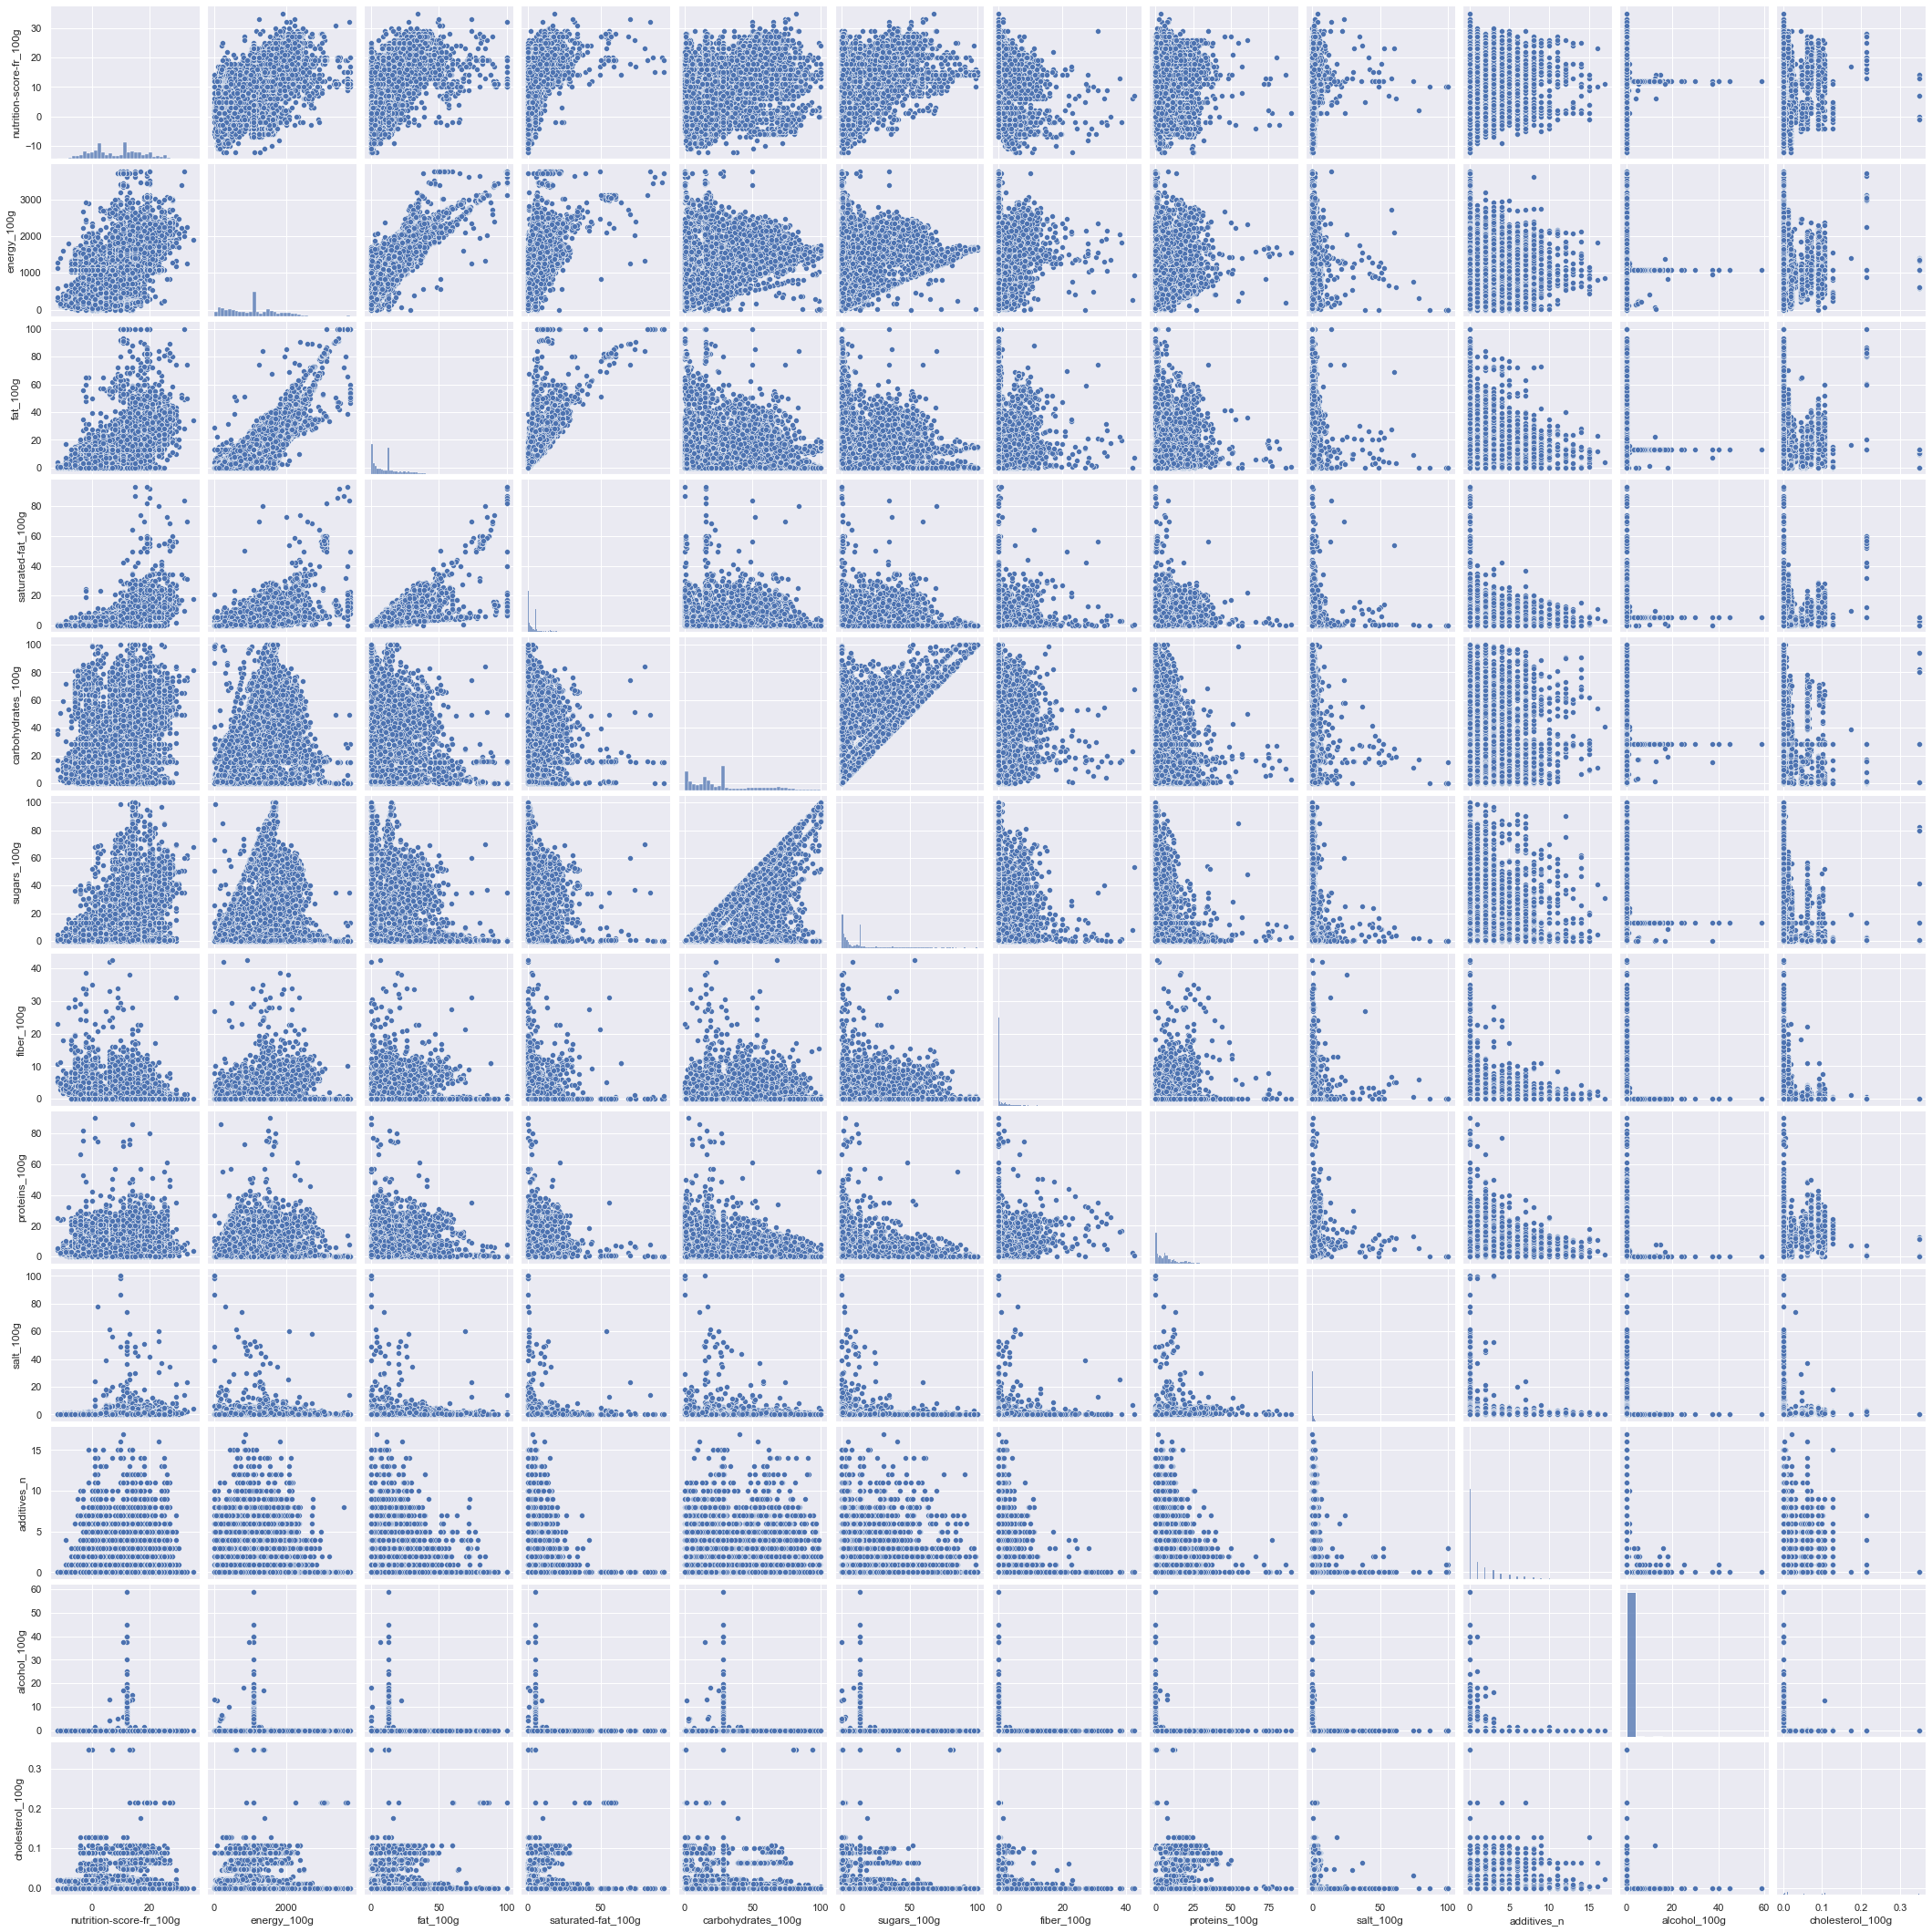

In [19]:
sns.pairplot(data=sample)

On voit clairement que les variables `saturated-fat_100g` et `sugars_100g` restent toujours inférieures à `fat_100g` et `carbohydrates_100g` respectivement.

### Matrice des corrélations

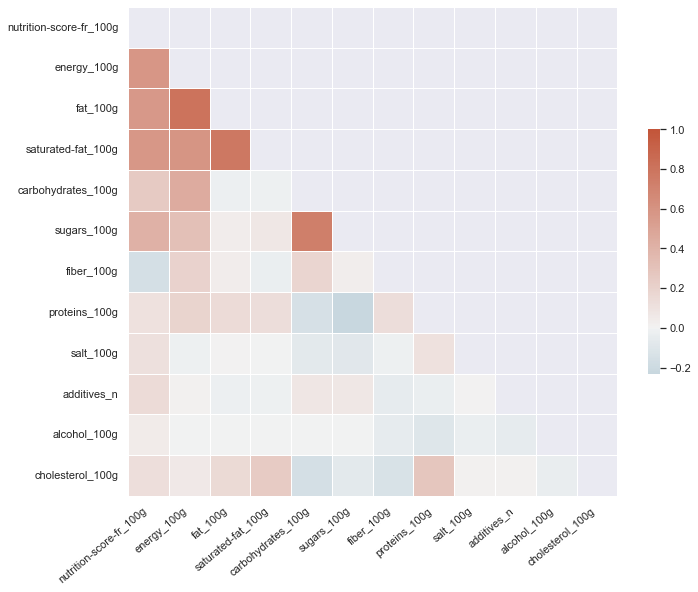

In [20]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(rotation=40, horizontalalignment='right');

## Relations numérique / catégorielle

### Relation entre nutriscores

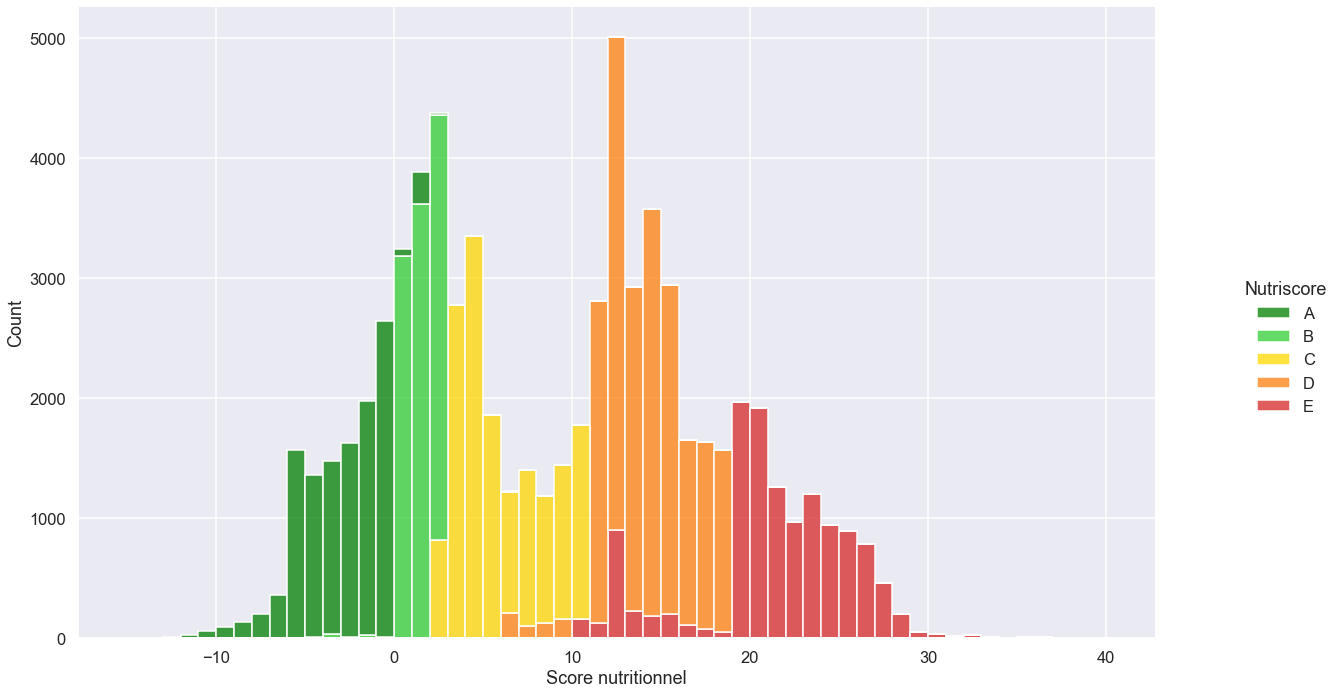

In [21]:
sns.set_theme('talk')
g = sns.displot(x='nutrition-score-fr_100g', 
            data=df.sort_values('nutrition_grade_fr'), hue='nutrition_grade_fr', 
            bins=55, multiple='stack', palette=palette, legend=True,
            height=10, aspect=10/6)
plt.xlabel('Score nutritionnel')
g.legend.set_title('Nutriscore');
sns.set_theme('notebook')

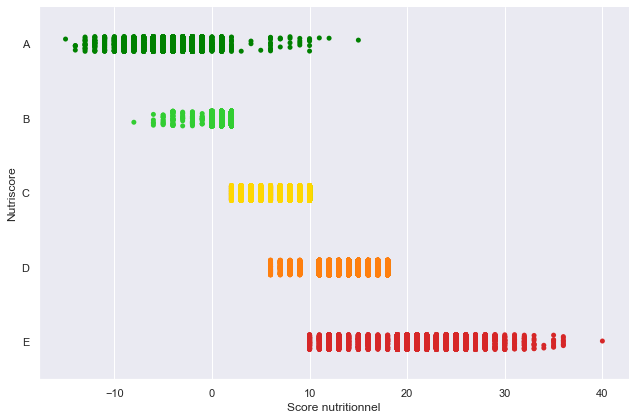

In [22]:
sns.catplot(x='nutrition-score-fr_100g', y='nutrition_grade_fr', data=df, order=list('ABCDE'),
           height=6, aspect=1.5, palette=palette)
plt.xlabel('Score nutritionnel')
plt.ylabel('Nutriscore');

On peut voir qu'une même valeur du score nutritionnel peut correspondre à différents nutriscores. Regardons si cela est dû à la différence de notation entre les aliments solides et les boissons.

Répartition du nutriscore en fonction du score nutritionnel pour les **aliments solides**

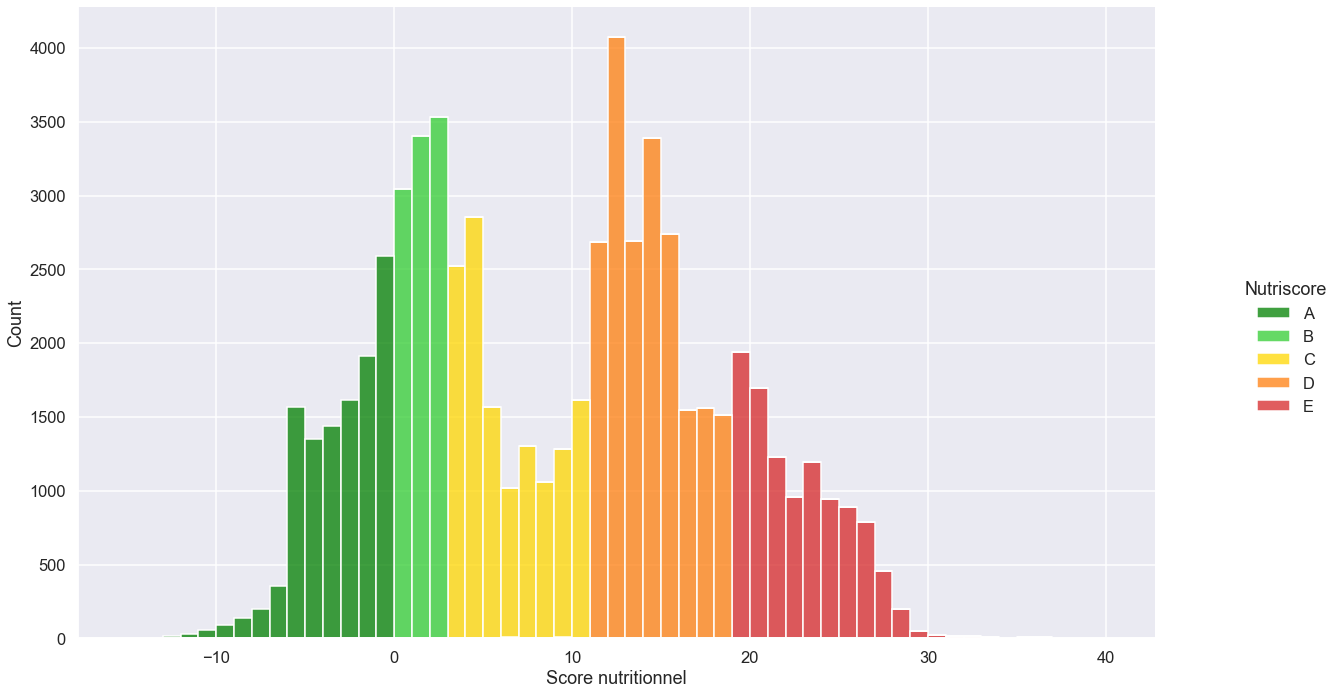

In [23]:
mask = df['pnns_groups_1'] == 'Beverages'
sns.set_theme('talk')
g = sns.displot(x='nutrition-score-fr_100g', 
            data=df[~mask].sort_values('nutrition_grade_fr'), hue='nutrition_grade_fr', 
            binwidth=1, binrange=[-15, 40], multiple='stack', palette=palette, legend=True,
            height=10, aspect=10/6)
plt.xlabel('Score nutritionnel')
g.legend.set_title('Nutriscore');
sns.set_theme('notebook')

On peut voir que pour les aliments solides, une valeur de score nutritionnel correspond bien à une seule valeur de nutriscore

Répartition du nutriscore en fonction du score nutritionnel pour les **boissons**

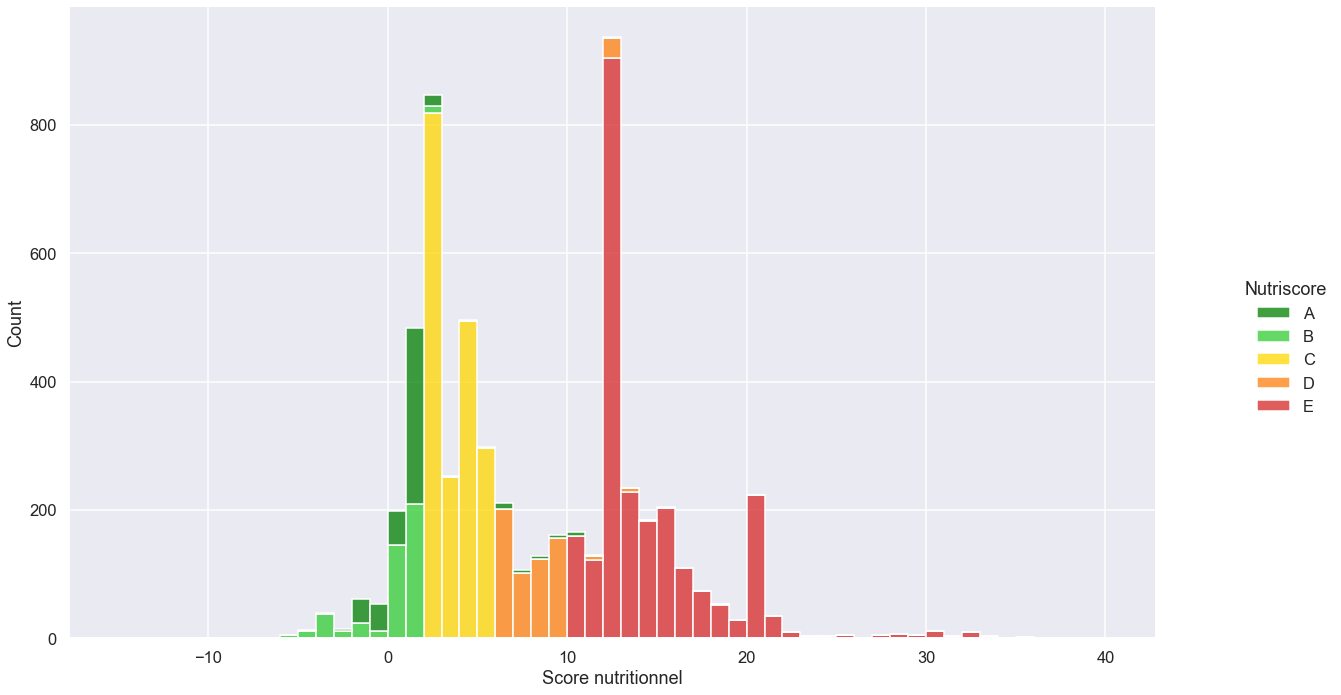

In [24]:
mask = df['pnns_groups_1'] == 'Beverages'
sns.set_theme('talk')
g = sns.displot(x='nutrition-score-fr_100g', 
            data=df[mask].sort_values('nutrition_grade_fr'), hue='nutrition_grade_fr', 
            binwidth=1, binrange=[-15, 40], multiple='stack', palette=palette, legend=True,
            height=10, aspect=10/6)
plt.xlabel('Score nutritionnel')
g.legend.set_title('Nutriscore');
sns.set_theme('notebook')

On peut voir qu'il y a quelques erreurs dans l'attribution du nutriscore pour les boissons mais globalement la limite entre les nutriscores est respectée. La présence de la note **A** pour des valeurs élevées du score nutritionnel est dû à la présence de l'eau qui possède toujours ce nutriscore.

### Relation  Apports nutritionnels / Nutriscore

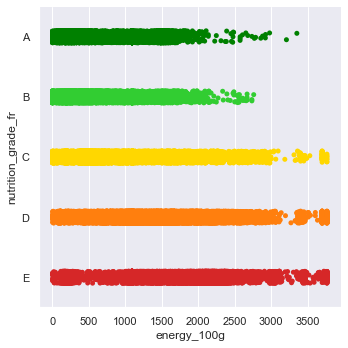

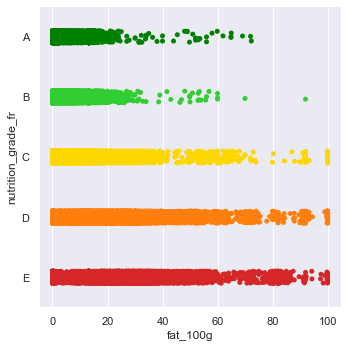

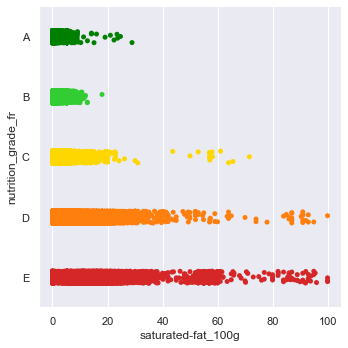

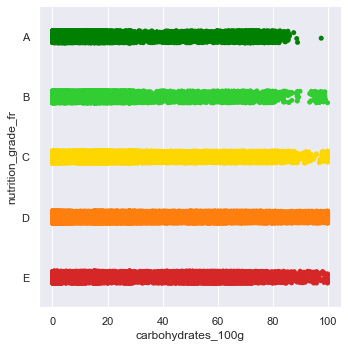

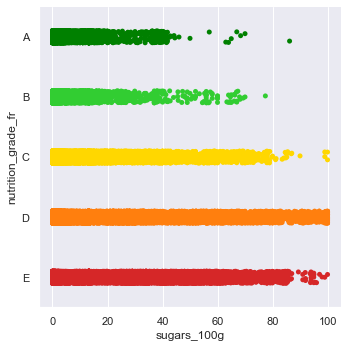

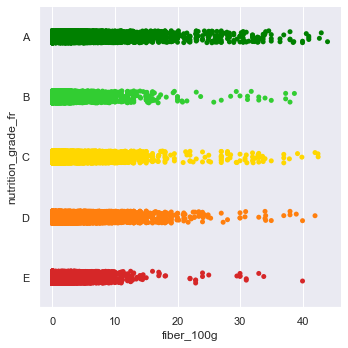

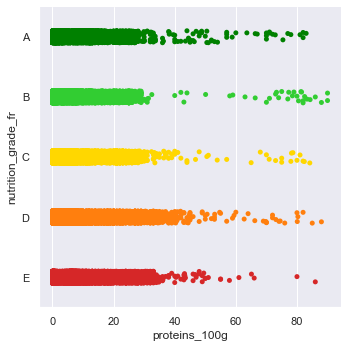

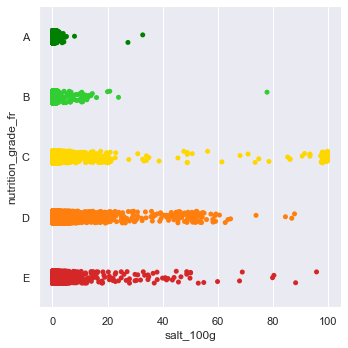

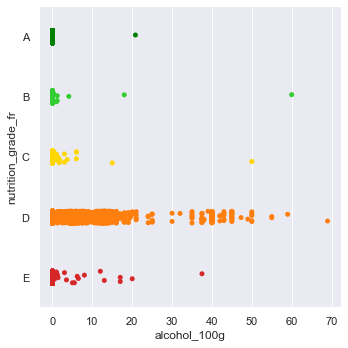

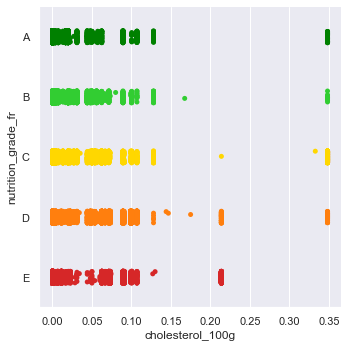

In [25]:
for col in nutrition_facts:
    fg = sns.catplot(x=col, y='nutrition_grade_fr', data=df, order=list('ABCDE'), palette=palette)
    #fg.ax.set_xlim(-10, 110)

On peut voir que les aliments avec un bon nutriscore contiennent généralement peu de calories, peu de matières grasses, peu de sucre, peu de sel et beaucoup de fibres. On retrouve bien ici les critères de calcul du nutriscore.

### Relation nb d'additifs / Nutriscore

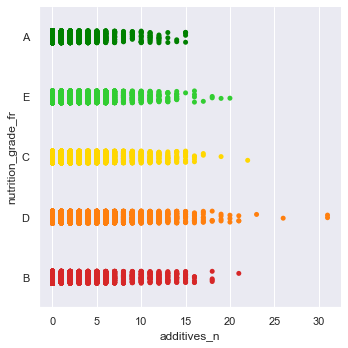

In [26]:
sns.catplot(x='additives_n', y='nutrition_grade_fr', data=df, palette=palette)

On ne voit pas vraiment de relation entre ces variables

### Relation Score nutritionnel / pnns_groups_1

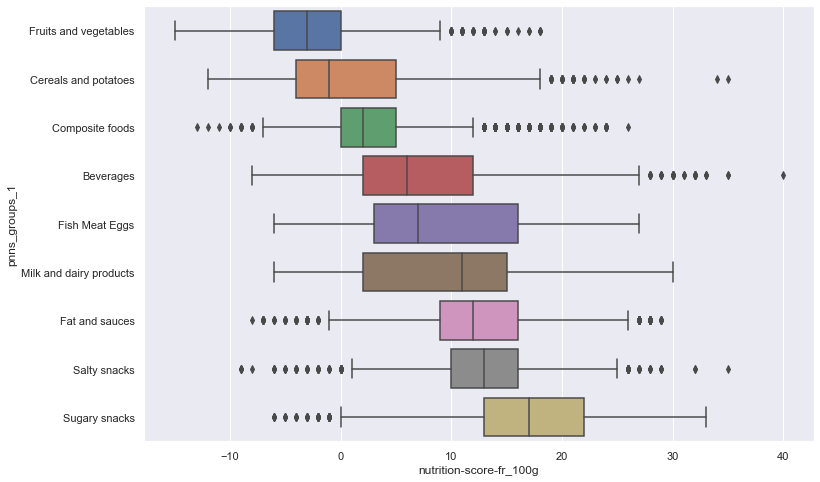

In [27]:
# On classe par ordre croissant de la médiane
order = df.groupby('pnns_groups_1')['nutrition-score-fr_100g'].median().sort_values().index

plt.figure(figsize=(12,8))
sns.boxplot(x="nutrition-score-fr_100g", 
            y="pnns_groups_1", 
            showfliers=True,
            order=order, 
            data=df);

On peut voir que les aliments avec le meilleur score nutritionnel (valeur la plus faible) sont les fruits et légumes et les céréales et pommes de terre. En revanche, les collations sucrées et salées sont les groupes présentant le plus mauvais nutriscore.

## Relation catégorielle / catégorielle

### Relation Nutriscore / pnns groups

#### pnns groups 1

In [28]:
cross = pd.crosstab(df["nutrition_grade_fr"], df["pnns_groups_1"])
cross

pnns_groups_1,Beverages,Cereals and potatoes,Composite foods,Fat and sauces,Fish Meat Eggs,Fruits and vegetables,Milk and dairy products,Salty snacks,Sugary snacks
nutrition_grade_fr,,,,,,,,,
A,463,2979,1211,81,436,3105,410,46,58
B,470,958,2307,173,827,745,1109,56,260
C,1863,1032,1426,795,2173,324,1334,515,1105
D,630,582,813,1747,1773,53,2944,1050,3503
E,2392,63,64,635,1229,0,198,286,4033


On va classer les groupes en fonction de ceux qui possèdent le plus de **A**

In [29]:
order = df[df['nutrition_grade_fr'] == 'A']['pnns_groups_1'].value_counts().index
cross[order]

pnns_groups_1,Fruits and vegetables,Cereals and potatoes,Composite foods,Beverages,Fish Meat Eggs,Milk and dairy products,Fat and sauces,Sugary snacks,Salty snacks
nutrition_grade_fr,,,,,,,,,
A,3105,2979,1211,463,436,410,81,58,46
B,745,958,2307,470,827,1109,173,260,56
C,324,1032,1426,1863,2173,1334,795,1105,515
D,53,582,813,630,1773,2944,1747,3503,1050
E,0,63,64,2392,1229,198,635,4033,286


Visualisons cela dans un graphique

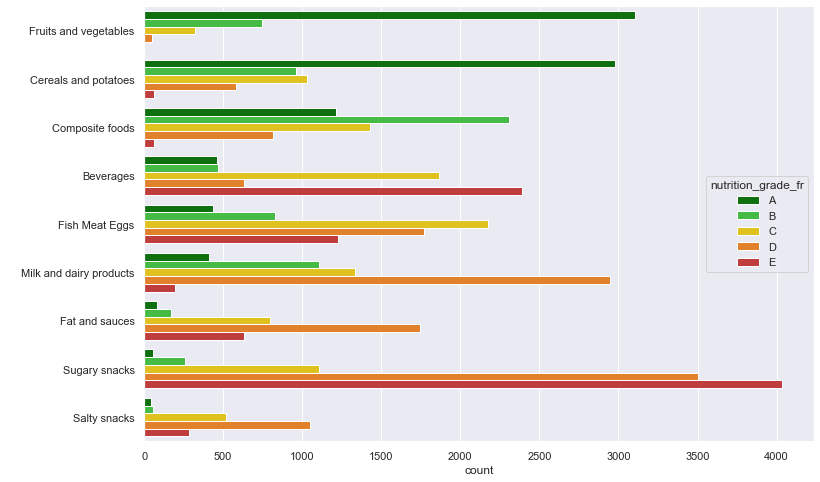

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
g = sns.countplot(y='pnns_groups_1', data=df, hue='nutrition_grade_fr', hue_order=list('ABCDE'), 
                  order=order, palette=palette)
g.axes.set_ylabel(' ');

Distribution des notes pour chaque groupe aliment :

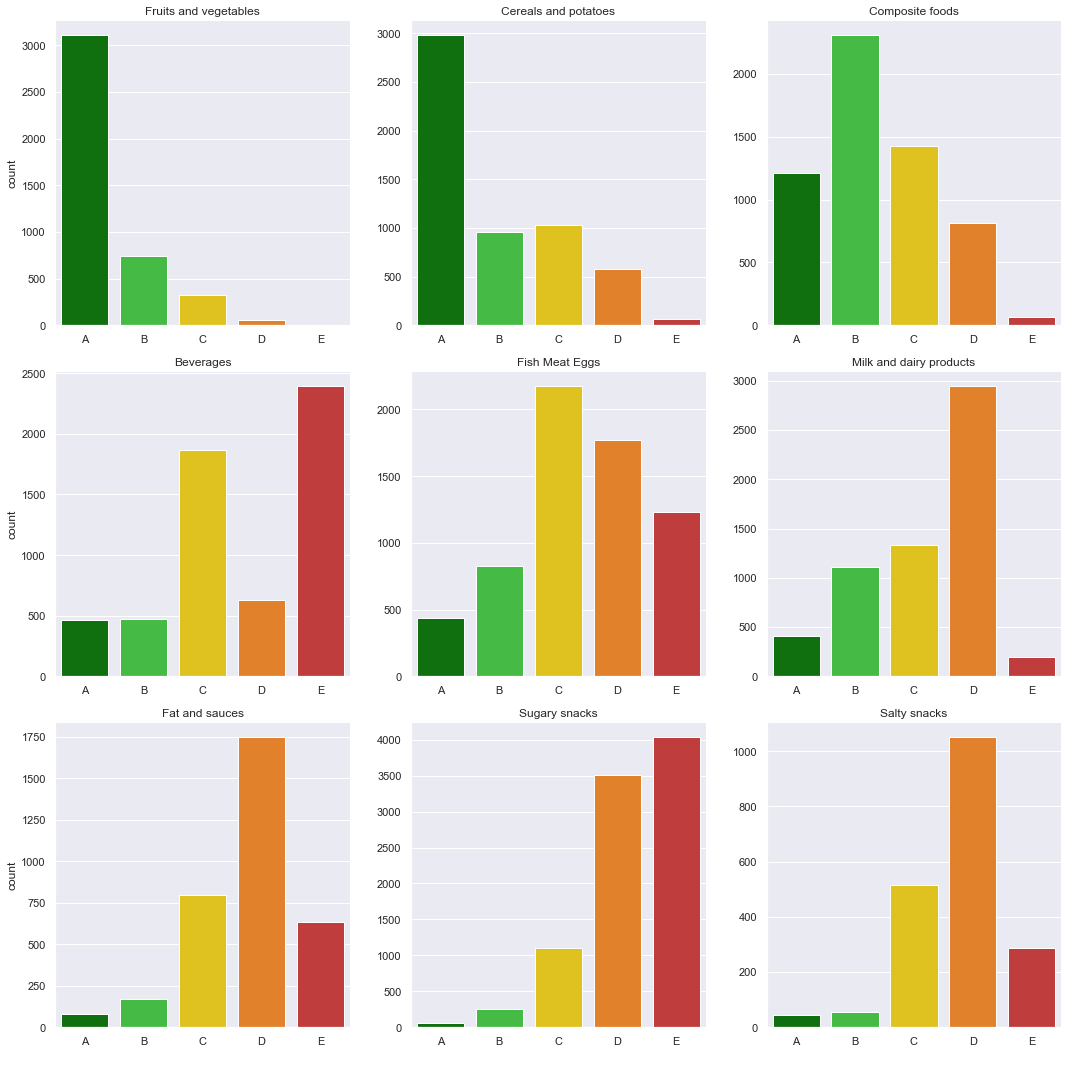

In [31]:
g = sns.catplot(x='nutrition_grade_fr', col='pnns_groups_1', col_wrap=3, data=df, kind='count',
           order=list('ABCDE'), sharex=False, sharey=False, col_order=order, palette=palette)
g.set_titles("{col_name}")
g.set_xlabels(' ');

### Relation entre pnns_groups

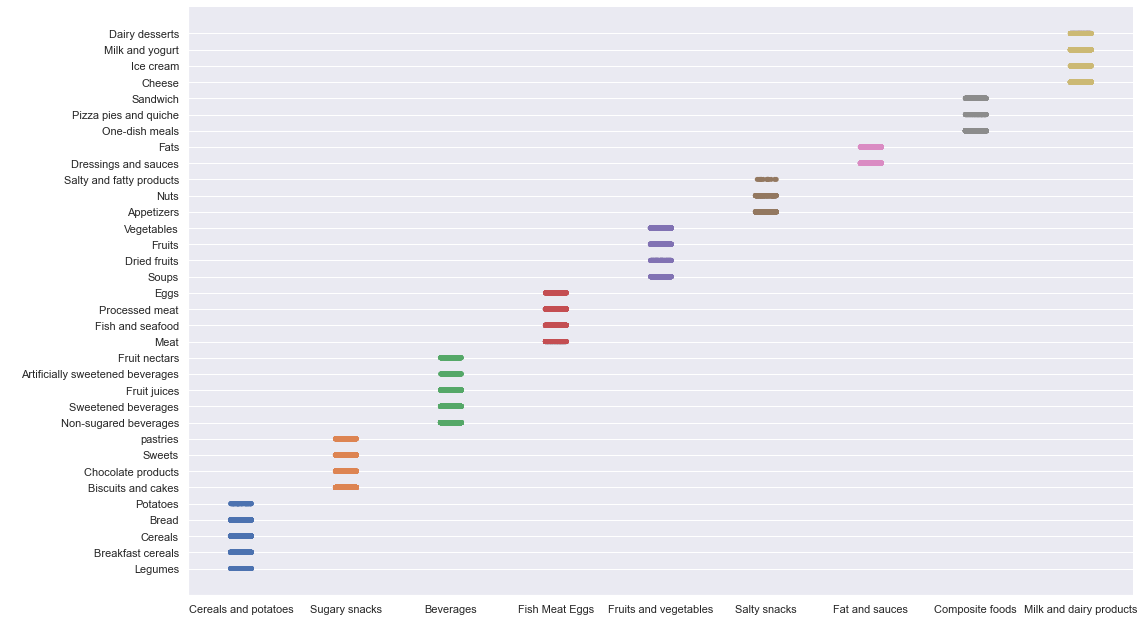

In [32]:
sns.catplot(x='pnns_groups_1', y='pnns_groups_2', data=df,
           height=9, aspect=16/9)
#plt.xticks(rotation=10)
plt.xlabel(' ')
plt.ylabel(' ');

On voit que chaque valeur de `pnns_groups_2` correspond à une seule valeur de `pnns_groups_1`

In [33]:
cross = pd.crosstab(df['pnns_groups_1'], df['pnns_groups_2'])
cross

pnns_groups_2,Appetizers,Artificially sweetened beverages,Biscuits and cakes,Bread,Breakfast cereals,Cereals,Cheese,Chocolate products,Dairy desserts,Dressings and sauces,...,Pizza pies and quiche,Potatoes,Processed meat,Salty and fatty products,Sandwich,Soups,Sweetened beverages,Sweets,Vegetables,pastries
pnns_groups_1,,,,,,,,,,,,,,,,,,,,,
Beverages,0,182,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1420,0,0,0
Cereals and potatoes,0,0,0,1218,960,2837,0,0,0,0,...,0,96,0,0,0,0,0,0,0,0
Composite foods,0,0,0,0,0,0,0,0,0,0,...,429,0,0,0,627,0,0,0,0,0
Fat and sauces,0,0,0,0,0,0,0,0,0,2341,...,0,0,0,0,0,0,0,0,0,0
Fish Meat Eggs,0,0,0,0,0,0,0,0,0,0,...,0,0,2753,0,0,0,0,0,0,0
Fruits and vegetables,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,400,0,0,2119,0
Milk and dairy products,0,0,0,0,0,0,2814,0,714,0,...,0,0,0,0,0,0,0,0,0,0
Salty snacks,1501,0,0,0,0,0,0,0,0,0,...,0,0,0,14,0,0,0,0,0,0
Sugary snacks,0,0,3493,0,0,0,0,1949,0,0,...,0,0,0,0,0,0,0,3066,0,451


On vérifie qu'à chaque valeur de `pnns_groups_2` correspond une seule valeur de `pnns_groups_1`

In [34]:
(cross>0).sum()

pnns_groups_2
Appetizers                          1
Artificially sweetened beverages    1
Biscuits and cakes                  1
Bread                               1
Breakfast cereals                   1
Cereals                             1
Cheese                              1
Chocolate products                  1
Dairy desserts                      1
Dressings and sauces                1
Dried fruits                        1
Eggs                                1
Fats                                1
Fish and seafood                    1
Fruit juices                        1
Fruit nectars                       1
Fruits                              1
Ice cream                           1
Legumes                             1
Meat                                1
Milk and yogurt                     1
Non-sugared beverages               1
Nuts                                1
One-dish meals                      1
Pizza pies and quiche               1
Potatoes                            

En revanche, on peut remarquer que le tableau croisés des pnns_groups ne contient pas toutes les valeurs de `pnns_groups_2`

In [35]:
# valeurs de pnns_groups_2 qui ne correspondent à aucune valeur de pnns_groups_1
df[df['pnns_groups_1'].isna()]['pnns_groups_2'].unique()

array([nan, 'Alcoholic beverages', 'Tripe dishes'], dtype=object)

### main_category / pnns_groups

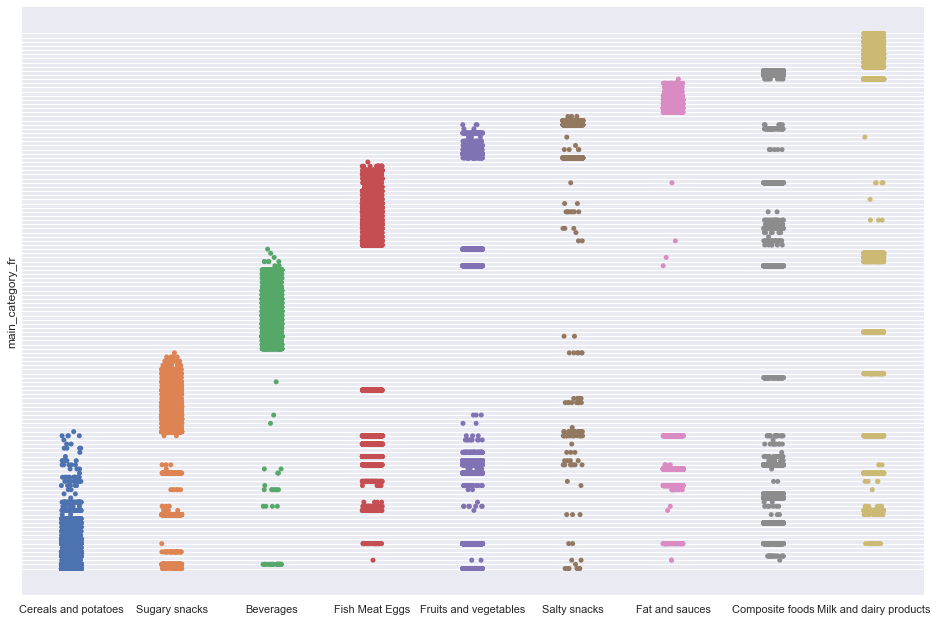

In [36]:
sns.catplot(x='pnns_groups_1', y='main_category_fr', data=df,
           height=9, aspect=16/9)
#plt.xticks(rotation=50)
plt.tick_params(left=False, labelleft=False)
plt.xlabel(' ');

Il semble y avoir des catégories qui rentrent dans plusieurs valeurs de `pnns_groups_1`. Vérifions cela avec pandas

In [37]:
cross = pd.crosstab(df['main_category_fr'], df['pnns_groups_1'])

In [38]:
(cross>0).T.sum().sort_values(ascending=False)

main_category_fr
Conserves                    8
Aliments pour bébé           8
Produits à tartiner salés    8
Surgelés                     8
Produits à tartiner          6
                            ..
Glaces et sorbets            1
Huiles                       1
Plats préparés               1
Huiles d'olive               1
Nectars de fruits            1
Length: 130, dtype: int64

En effet, certaines catégories peuvent se trouver jusqu'à dans 8 groupes différents

Voyons ce qu'il en est pour la répartition des catégories dans les groupes de `pnns_groups_2`

In [39]:
cross = pd.crosstab(df['main_category_fr'], df['pnns_groups_2'])

In [40]:
(cross>0).T.sum().sort_values(ascending=False)

main_category_fr
Surgelés                            17
Conserves                           13
Produits à tartiner salés           12
Aliments pour bébé                  12
Produits labellisés                 12
                                    ..
Jus de fruits 100% pur jus           1
Jus d'orange à base de concentré     1
Sandwichs                            1
Petits beurres                       1
Poissons fumés                       1
Length: 131, dtype: int64

Là aussi on peut trouver plusieurs catégories dans un même groupe

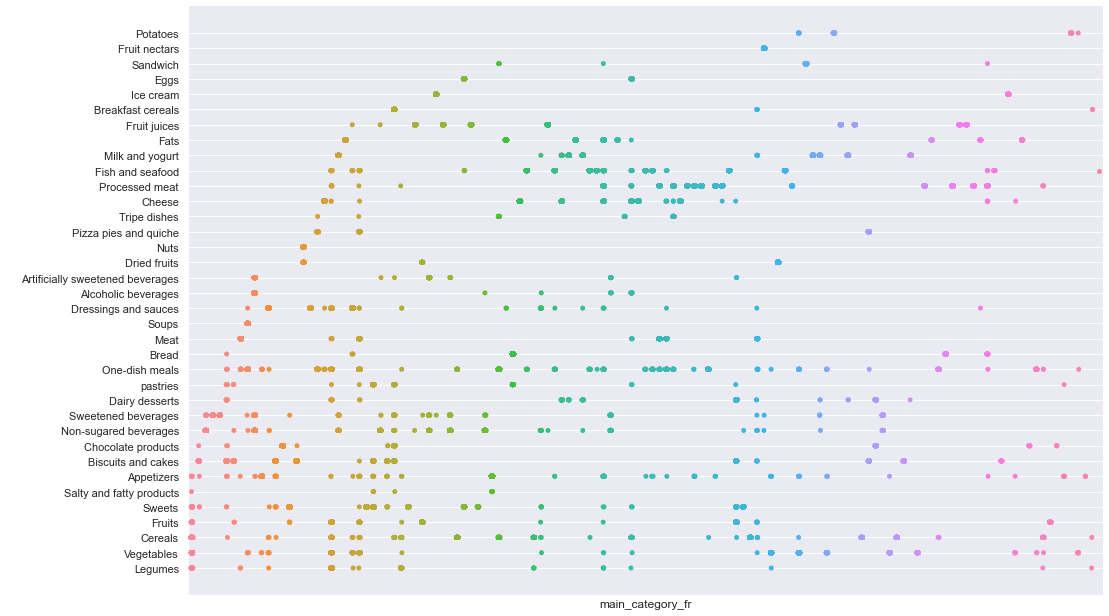

In [41]:
sns.catplot(x='main_category_fr', y='pnns_groups_2', data=df[df['pnns_groups_2'].notna()],
           height=9, aspect=16/9)
#plt.xticks(rotation=50)
plt.tick_params(bottom=False, labelbottom=False)
plt.ylabel(' ');

# Analyse multivariée

## ACP

Nous allons appliquer l'Analyse en Composantes Principales sur notre jeu de données nettoyé et rempli puis nous comparerons les résultats avec le jeu de données nettoyé mais dont les valeurs manquantes n'ont pas été imputées pour voir si les résultats sont similaires et ainsi vérifier la qualité de l'imputation.

### Data remplies

In [42]:
# selection des colonnes à prendre en compte dans l'ACP
data_pca = df.select_dtypes(np.number)
data_pca.head()

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,additives_n,alcohol_100g,cholesterol_100g
182,-2,1093.022712,13.168396,5.196503,28.010448,13.188017,0.0,10.0,0.090,0.0,0.0,0.000000
184,20,1093.022712,13.168396,5.196503,28.010448,13.188017,0.0,6.4,0.560,3.0,0.0,0.091000
188,2,1093.022712,13.168396,5.196503,28.010448,13.188017,0.0,0.5,0.000,0.0,0.0,0.000805
190,14,1753.000000,16.771678,0.800000,100.000000,87.700000,0.9,0.6,0.010,0.0,0.0,0.000000
191,14,2406.000000,26.219487,2.900000,64.552212,50.300000,3.9,9.5,0.003,0.0,0.0,0.000000


ACP avec le tableau échantillon

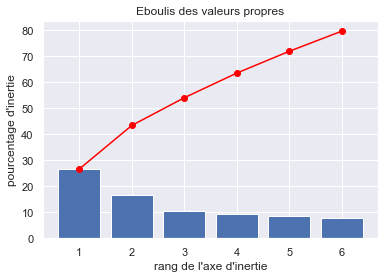

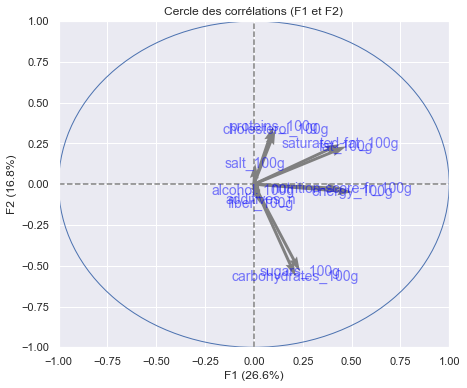

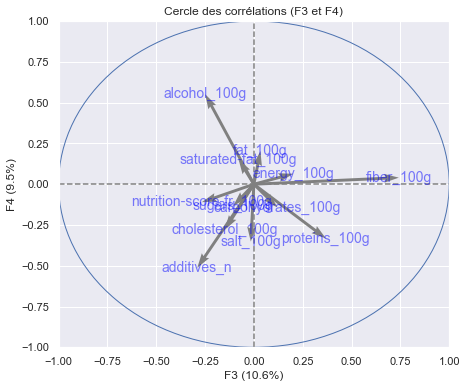

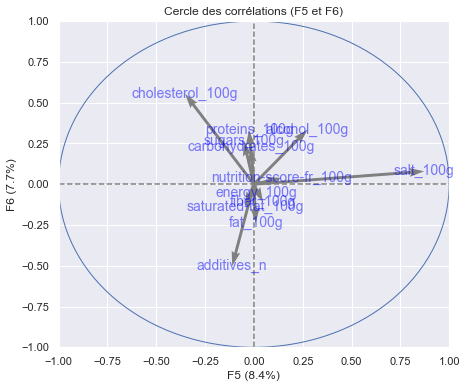

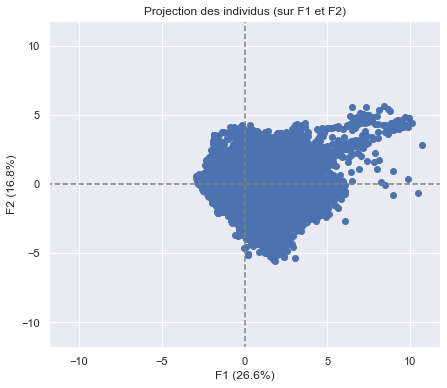

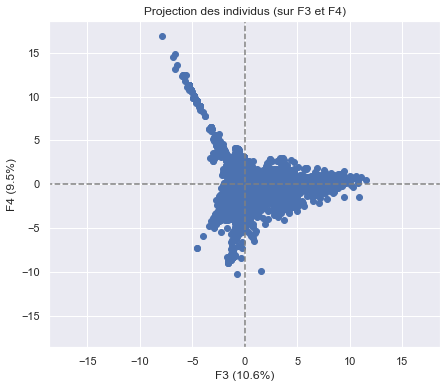

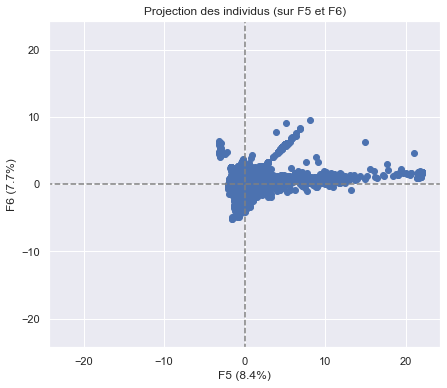

In [43]:
# choix du nombre de composantes à calculer
n_comp = 6

# préparation des données pour l'ACP
X = data_pca.values
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_ # vecteurs propores
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)])

plt.show()

On crée un DataFrame croisant les composantes principales et les variables de l'ACP

In [44]:
composantes = []
for i in np.arange(n_comp)+1:
    composantes.append('F%i'%i)
composantes

pcs_df = pd.DataFrame(pcs, index=composantes, columns=df.select_dtypes(np.number).columns)
pcs_df

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,additives_n,alcohol_100g,cholesterol_100g
F1,0.449537,0.504091,0.472633,0.441234,0.213847,0.235861,0.034338,0.098999,0.006861,0.035428,-0.002522,0.109953
F2,-0.025953,-0.048200,0.231727,0.246029,-0.565881,-0.534811,-0.121358,0.352769,0.126753,-0.092929,-0.043438,0.332819
F3,-0.266288,0.201628,0.033620,-0.078323,0.120609,-0.105519,0.742250,0.368723,-0.015708,-0.289933,-0.249049,-0.149218
F4,-0.109965,0.064277,0.203320,0.152067,-0.142268,-0.133479,0.040355,-0.332449,-0.351665,-0.512705,0.551638,-0.279761
F5,0.141179,0.010264,0.009864,-0.044880,-0.015054,-0.051008,0.046888,-0.025146,0.871922,-0.111025,0.274913,-0.352194
F6,0.038555,-0.053654,-0.238175,-0.136821,0.227015,0.263825,-0.110026,0.331653,0.079174,-0.501785,0.334766,0.553916


Visualisation des corrélations

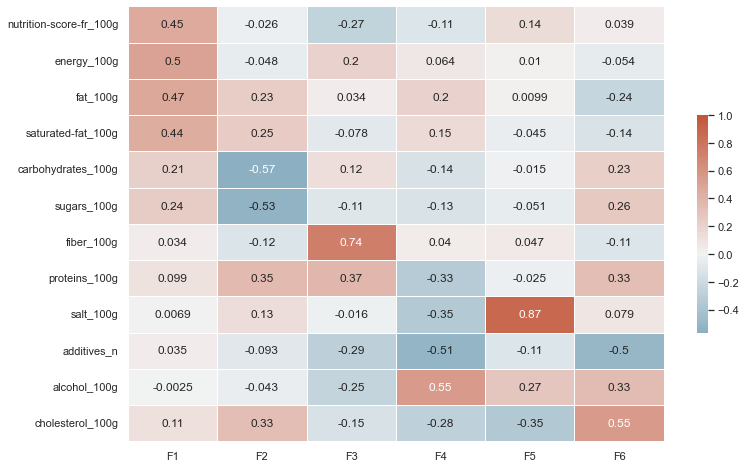

In [45]:
fig, ax = plt.subplots(figsize=(12,8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(pcs_df.T, cmap=cmap, vmax=1, center=0, ax=ax, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": .5});

On peut voir que la première composante `F1` est corrélée avec les variables `nutrition-score-fr_100g`, `energy_100g`, `fat_100g` et `saturated-fat_100g`, qui sont elles-même corrélées entre elles Cette composante est donc liée aux matières grasses. <br>
La composante `F2` est anti-corrélée avec `carbohydrates_100g` et `sugars_100g`, elle est donc liée aux glucides. <br>
La composante `F3` est fortement corrélée avec `fiber_100g` et légèrement avec `proteins_100g` qui sont des éléments contribuant à améliorer le nutriscore de l'aliment.

### Data non imputées

On va comparer avec les données dont les nan n'ont pas été remplis pour comparer et voir si on obtient des résultats similaires

In [46]:
df_nan = pd.read_csv('df_nan.csv', index_col=0)
# On enlève les colonnes 'alcohol_100g' et 'cholesterol_100g' car elles contiennent trop de valeurs manquantes
df_nan = df_nan.drop(columns=['alcohol_100g', 'cholesterol_100g'])

In [47]:
# selection des colonnes à prendre en compte dans l'ACP
data_pca = df_nan.select_dtypes(np.number)
data_pca = data_pca.dropna()
data_pca.shape

(23038, 10)

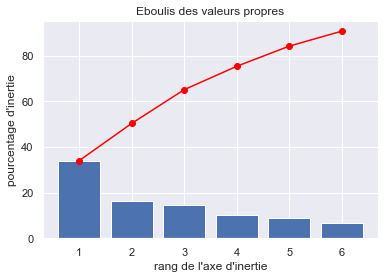

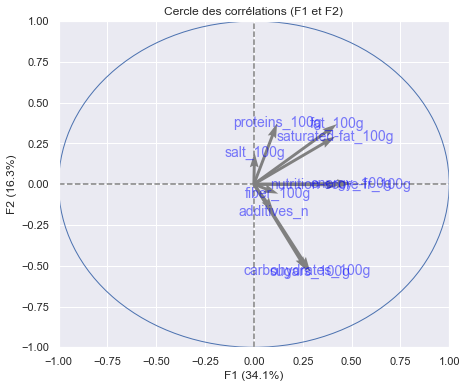

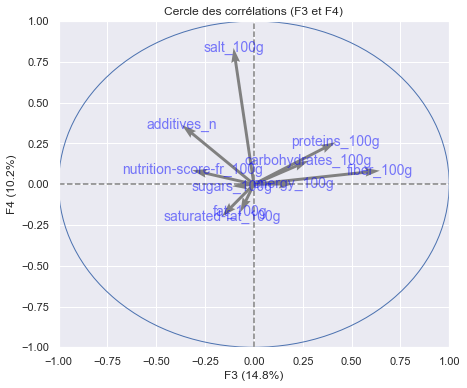

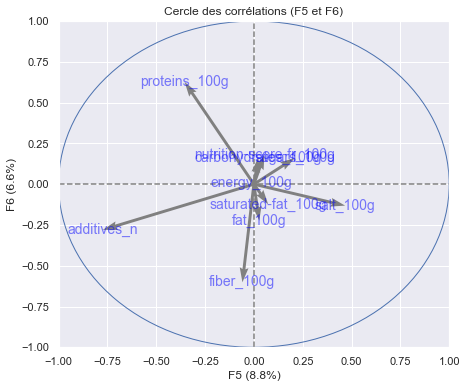

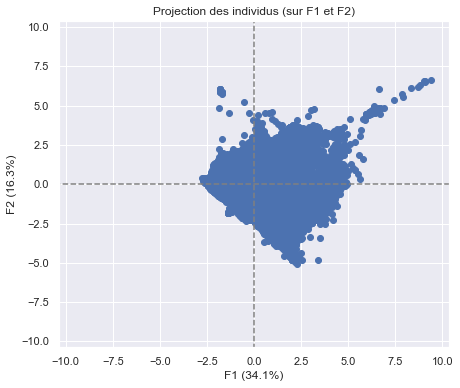

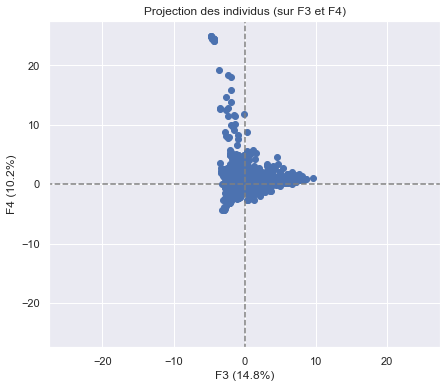

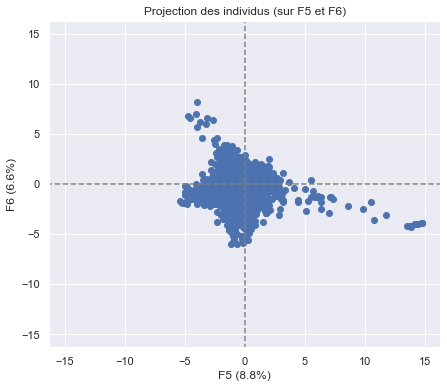

In [48]:
# choix du nombre de composantes à calculer
n_comp = 6

# préparation des données pour l'ACP
X = data_pca.values
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_ # vecteurs propores
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)])

plt.show()

On crée un DataFrame croisant les composantes principales et les variables de l'ACP

In [49]:
composantes = []
for i in np.arange(n_comp)+1:
    composantes.append('F%i'%i)
composantes

pcs_df = pd.DataFrame(pcs, index=composantes, columns=df_nan.select_dtypes(np.number).columns)
pcs_df

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,additives_n
F1,0.445220,0.500332,0.424930,0.416525,0.272374,0.288325,0.124696,0.119027,0.003456,0.101692
F2,-0.003950,0.004351,0.368541,0.292139,-0.531508,-0.535977,-0.058100,0.373485,0.193100,-0.169913
F3,-0.316036,0.202479,-0.069634,-0.163251,0.280242,-0.110063,0.644773,0.418230,-0.104091,-0.368091
F4,0.086204,0.001664,-0.172214,-0.197537,0.144128,-0.012957,0.083003,0.257464,0.835778,0.362277
F5,0.053881,-0.012433,0.027752,0.073320,0.022572,0.209301,-0.058713,-0.354407,0.467354,-0.773956
F6,0.179851,0.010975,-0.223972,-0.123384,0.162131,0.160123,-0.601454,0.626751,-0.131324,-0.280018


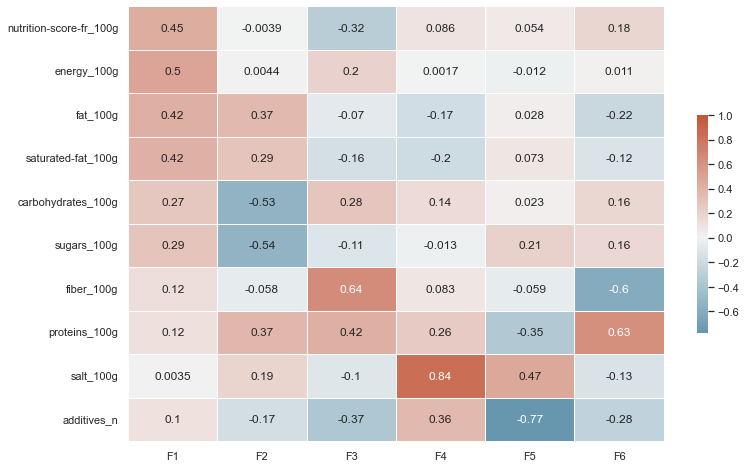

In [50]:
fig, ax = plt.subplots(figsize=(12,8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(pcs_df.T, cmap=cmap, vmax=1, center=0, ax=ax, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": .5});

On voit que les composantes principales sont globalement corrélées avec les mêmes variables que dans le cas précédent, avec des coefficients qui peuvent légèrement varier

## ANOVA

On va définir une fonction qui va renvoyer les résultats d'ANOVA entre une variable qualitative X et une variable quantitative Y

In [51]:
def anova(X_name, Y_name, data, print_values=False):

    k = len(data[X_name].unique())  # number of groups
    N = len(data.values)  # total number of values
    n = data.groupby(X_name).size() # number of values in each group

    # Degrees of freedom
    databetween = k - 1
    datawithin = N - k
    datatotal = N - 1

    y = data[Y_name]
    y_mean = y.mean()
    yi_means = data.groupby(X_name).mean()[Y_name]
    
    # Sum of Squares Between
    SSbetween = (n*(yi_means - y_mean)**2).sum()

    # Sum of Squares Within
    groups = data[X_name].unique()
    group_var = []
    for group in groups:
        y_group = data.loc[data[X_name] == group, [Y_name]]
        group_var.append(((y_group.values - yi_means[group])**2).sum())
    SSwithin = np.array(group_var).sum()

    # Sum of Squares Total
    SStotal = ((y - y_mean)**2).sum()

    # Mean Square Between
    MSbetween = SSbetween/databetween

    # Mean Square Within
    MSwithin = SSwithin/datawithin

    # Calculating the F-value
    F = MSbetween/MSwithin

    # p-value
    p = stats.f.sf(F, databetween, datawithin)

    # eta squared
    eta_sqrd = SSbetween/SStotal

    # omega squared
    om_sqrd = (SSbetween - (databetween * MSwithin))/(SStotal + MSwithin)
    
    if print_values == True:
        print('eta squared :', eta_sqrd.round(3))
        #print('omega squared :', om_sqrd.round(3))
        #print('F-value :', F)
        print('p-value :', p)
        
    
    return eta_sqrd, p

On va utiliser la fonction pour calculer le $\eta^2$ et la p-value du test d'ANOVA entre toutes les variables de notre tableau et mettre les résultats dans deux tableau

In [52]:
eta_sqrd_matrix = {} # dictionnaire qui contiendra les valeurs de eta 2
p_value_matrix = {} # dictionnaire qui contiendra les valeurs de p-value
for X_name in list(df.select_dtypes('object')):
    # dictionnaires qui contiendront les valeurs de eta 2 et p-value entre la variable qualitative X_name
    # et les variables quantitatives
    eta_sqrd_X = {}
    p_value_X = {}
    for Y_name in list(df.select_dtypes(np.number)):
        mask = df[X_name].notna() & df[Y_name].notna()
        eta_sqrd, p_value = anova(X_name, Y_name, df[mask])
        eta_sqrd_X[Y_name] = eta_sqrd
        p_value_X[Y_name] = p_value
    eta_sqrd_matrix[X_name] = eta_sqrd_X
    p_value_matrix[X_name] = p_value_X

# transformation des dictionnaires en dataframes
eta_sqrd_matrix = pd.DataFrame(eta_sqrd_matrix)
p_value_matrix = pd.DataFrame(p_value_matrix)

On regarde s'il y a des valeurs de p-value supérieurs à 5%

In [53]:
p_value_matrix[p_value_matrix > 0.05].dropna(how='all')

,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr


Ce n'est pas le cas donc tous les résultats du test d'ANOVA sont significatifs

Visualisation de la matrice $\eta^2$

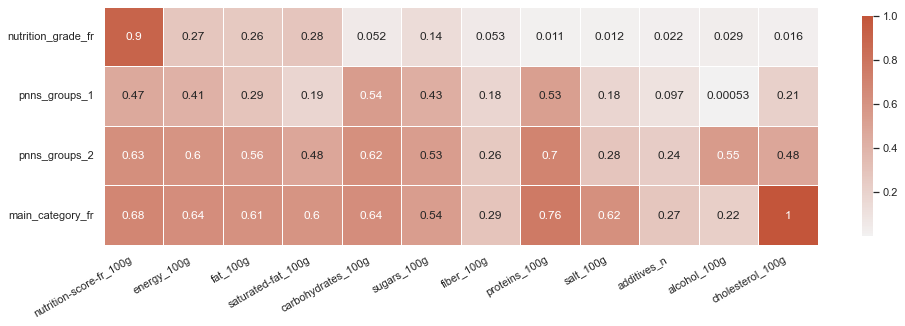

In [54]:
fig, ax = plt.subplots(figsize=(16, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(eta_sqrd_matrix.T, cmap=cmap, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .45});
plt.xticks(rotation=30, horizontalalignment='right');

On peut voir sans surprise que les nutriscores sont fortement corrélés entre eux. On peut également voir que la plupart des variables numériques sont corrélées aux variables `pnns_groups_2` et `main_category_fr` hormis `additives_n` et `fiber_100g` qui ne semblent corrélées à aucune variable. En revanche les variables sont moins corrélées à `pnns_groups_1`. On peut également remarquer l'étonnante corrélation entre `main_category_fr` et `cholesterol_100g` qui vaut 1. Vérifions si c'est un artefact lié à la méthode d'imputation en étudiant le $\eta^2$ entre ces deux variables sur le jeu de données initiale.

In [55]:
# Corrélation sur le jeu de données actuel
anova(X_name='main_category_fr', Y_name='cholesterol_100g', data=df[df['main_category_fr'].notna()],
     print_values=True);

eta squared : 0.995
p-value : 0.0


Vérifions cette corrélation sur le jeu de données initiale

In [56]:
data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t', low_memory=False)

In [57]:
mask = data['main_category_fr'].notna() & data['cholesterol_100g'].notna()
# nombre de lignes possédant une valeur à la fois pour 'main_category_fr' et pour 'cholesterol_100g'
print('nombre de lignes :', data[mask].shape[0])
anova(X_name='main_category_fr', Y_name='cholesterol_100g', data=data[mask],
     print_values=True);

nombre de lignes : 1761
eta squared : 0.031
p-value : 0.9999999999999999


On voit que la p-value est proche de 100% et donc le test d'ANOVA n'est pas significatif. On peut donc supposer que le résultat que nous avons obtenu précédemment était bien un artefact lié à l'imputation des données. C'est normal car la colonne `cholesterol_100g` était quasiment vide et nous l'avons principalement remplie en utilisant la variable `main_category_fr`, ce qui explique le $\eta^2$ proche de 1.